# Filtros Passa-Baixa, Passa-Alta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage, signal
import cv2
from math import sqrt, exp

sinc_trans = np.array(Image.open(r'..\images\sinc_trans.png').convert('L'))
sinc_rot = np.array(Image.open(r'..\images\sinc_rot.png').convert('L'))
sinc_rot2 = np.array(Image.open(r'..\images\sinc_rot2.png').convert('L'))
sinc_original = np.array(Image.open(r'..\images\sinc_original.png').convert('L'))
sinc_original_menor = np.array(Image.open(r'..\images\sinc_original_menor.tif').convert('L'))

#### 1-  Calcule e visualize o espectro de uma imagem 512x512 pixels:

a)   crie e visualize uma imagem simples – quadrado branco sobre fundo preto;

b)   calcular e visualizar seu espectro de Fourier (amplitudes);

c)    calcular e visualizar seu espectro de Fourier (fases);

d)   obter e visualizar seu espectro de Fourier centralizado;

e)   Aplique uma rotação de 40º no quadrado e repita os passo b-d;

f)   Aplique uma translação nos eixos x e y no quadrado e repita os passo b-d;

g)   Aplique um zoom na imagem e repita os passo b-d;

h)    Explique o que acontece com a transformada de Fourier quando é aplicado a rotação, translação e zoom.

C:\Users\Giova\AppData\Local\Temp\ipykernel_5260\2491568053.py:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


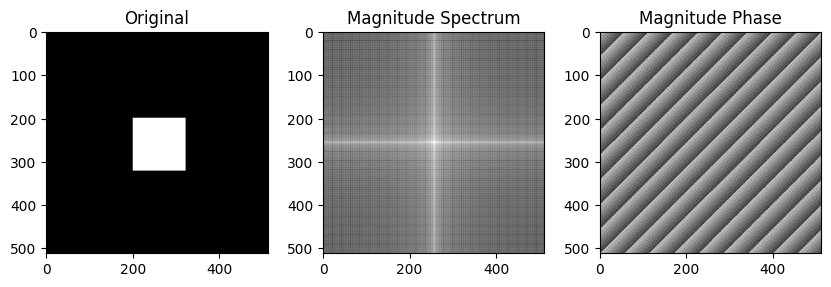

In [ ]:
def ff(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_fase = np.angle(fshift)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_fase, magnitude_spectrum

def show_img(img_original, img_spectrum, img_fase):
    fig = plt.figure(figsize=(10, 5))
    plt1 = plt.subplot(1, 3, 1)
    plt2 = plt.subplot(1, 3, 2)
    plt3 = plt.subplot(1, 3, 3)
    plt1.title.set_text("Original")
    plt2.title.set_text('Magnitude Spectrum')
    plt3.title.set_text('Magnitude Phase')
    plt1.imshow(img_original, cmap='gray')
    plt2.imshow(img_spectrum, cmap='gray')
    plt3.imshow(img_fase, cmap='gray')
    plt.subplots_adjust(wspace=0.25)

width = 512
height = 512
image_matrix = np.zeros([height, width])

image_matrix[200:322, 200:322] = 255

image_matrix_fase, image_matrix_spectrum = ff(image_matrix)
show_img(image_matrix, image_matrix_spectrum, image_matrix_fase)

Quando aplicada a rotação em 40 graus, o espectro de fourier todo é rotacionado em 40 graus, assim como a fase.

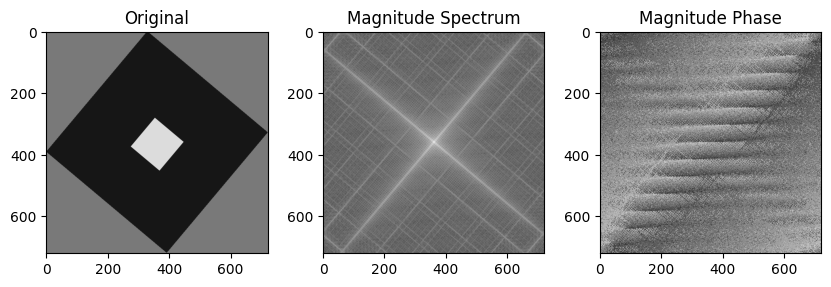

In [ ]:
image_matrix_40 = ndimage.rotate(image_matrix, -40, cval=128)
image_matrix_fase, image_matrix_spectrum = ff(image_matrix_40)
show_img(image_matrix_40, image_matrix_spectrum, image_matrix_fase)

C:\Users\Giova\AppData\Local\Temp\ipykernel_7984\2491568053.py:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


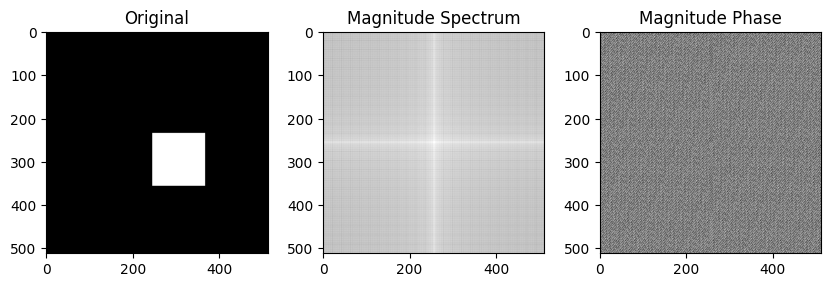

In [ ]:
translated_image_matrix = ndimage.shift(image_matrix, [35,45], mode='constant', cval=0)
image_matrix_fase, image_matrix_spectrum = ff(translated_image_matrix)
show_img(translated_image_matrix, image_matrix_spectrum, image_matrix_fase)

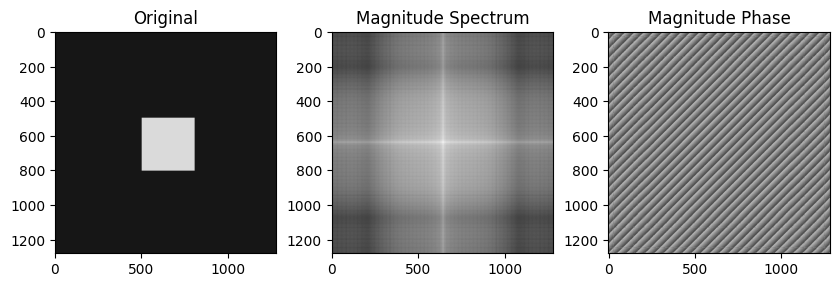

In [ ]:
zoom_image_matrix = ndimage.zoom(image_matrix, (2.5, 2.5))
image_matrix_fase, image_matrix_spectrum = ff(zoom_image_matrix)
show_img(zoom_image_matrix, image_matrix_spectrum, image_matrix_fase)

#### 2-     Crie filtros passa-baixa do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize o seguinte:

a)    a imagem inicial;

b)    a imagem do spectro de fourier;

c)    a imagem de cada filtro;

d)     a imagem resultante após aplicação de cada filtro.

 

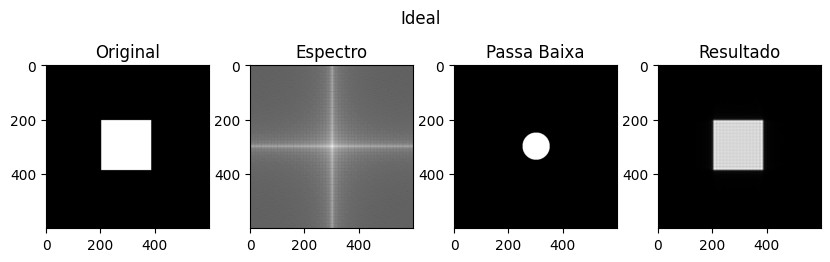

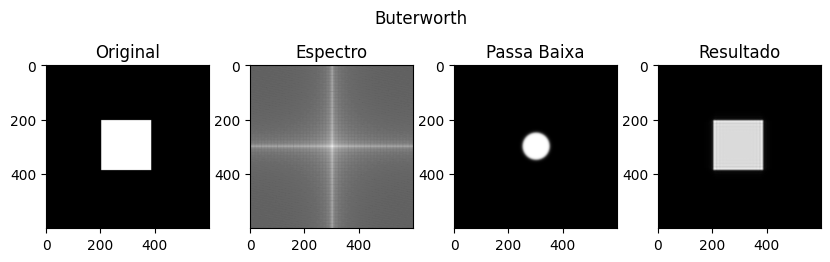

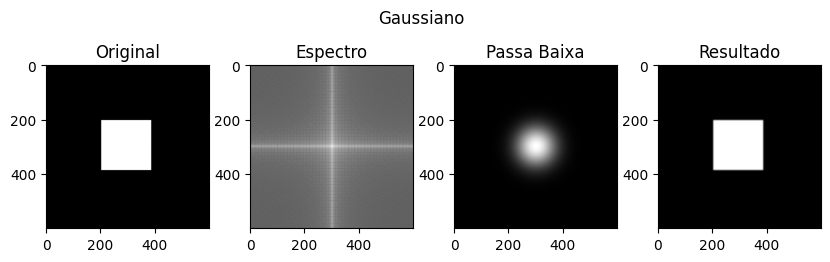

In [ ]:
def show_img(img_original, img_spectrum, img_low_pass, img_result, tipo):
    fig = plt.figure(figsize=(10, 5))
    plt1 = plt.subplot(1, 4, 1)
    plt2 = plt.subplot(1, 4, 2)
    plt3 = plt.subplot(1, 4, 3)
    plt4 = plt.subplot(1, 4, 4)
    plt1.title.set_text("Original")
    plt2.title.set_text('Espectro')
    plt3.title.set_text('Passa Baixa')
    plt4.title.set_text('Resultado')
    plt1.imshow(img_original, cmap='gray')
    plt2.imshow(img_spectrum, cmap='gray')
    plt3.imshow(img_low_pass, cmap='gray')
    plt4.imshow(img_result, cmap='gray')
    fig.suptitle(tipo, fontsize=12)
    plt.subplots_adjust(top=1.3, wspace=0.25)

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def passa_baixa_ideal(imgShape, D0):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def butterworth_passa_baixa(imgShape, D0, n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussiano_passa_baixa(imgShape, D0):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def aplica_filtro(image, filtro):
    filtro_img = image * filtro
    shift = np.fft.ifftshift(filtro_img)
    inverse = np.fft.ifft2(shift)
    return inverse

def fourier_centralized(image):
    ndImage =  np.array(Image.fromarray(image))
    center = np.fft.fftshift(np.fft.fft2(ndImage))
    return center

center = fourier_centralized(sinc_original)
passa_baixa = passa_baixa_ideal(sinc_original.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
espectro = ff(sinc_original)[1]
show_img(sinc_original,espectro, np.abs(passa_baixa),np.abs(passa_baixa_result), "Ideal")

passa_baixa = butterworth_passa_baixa(sinc_original.shape, 50, 10)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_original,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Buterworth")

passa_baixa = gaussiano_passa_baixa(sinc_original.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_original,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Gaussiano")


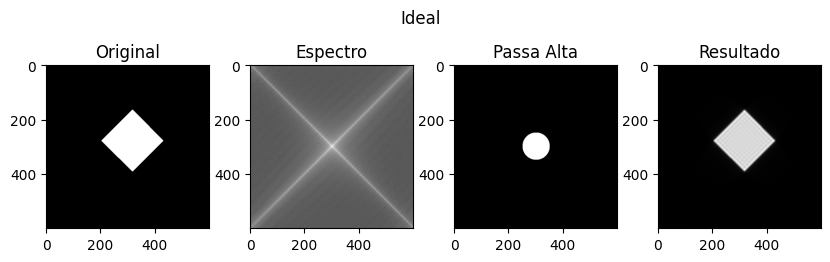

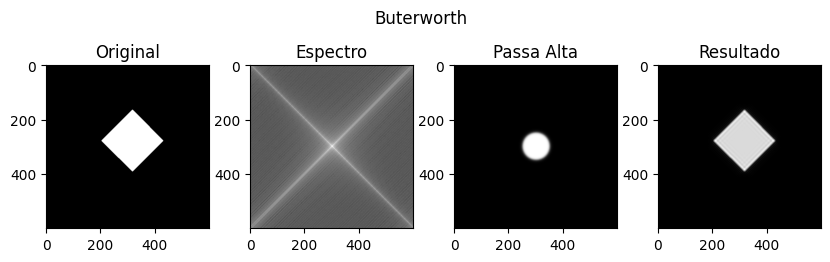

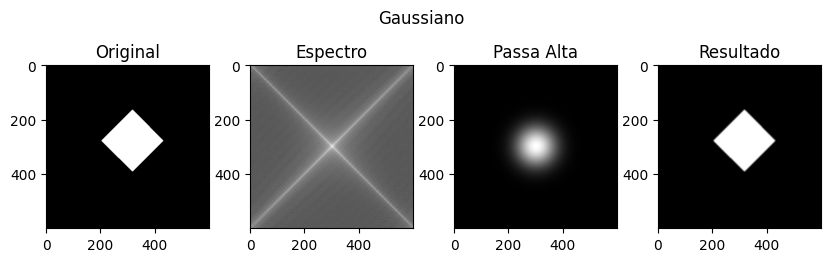

In [ ]:
center = fourier_centralized(sinc_rot)
passa_baixa = passa_baixa_ideal(sinc_rot.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
espectro = ff(sinc_rot)[1]
show_img(sinc_rot,espectro, np.abs(passa_baixa),np.abs(passa_baixa_result), "Ideal")

passa_baixa = butterworth_passa_baixa(sinc_rot.shape, 50, 10)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_rot,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Buterworth")

passa_baixa = gaussiano_passa_baixa(sinc_rot.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_rot,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Gaussiano")

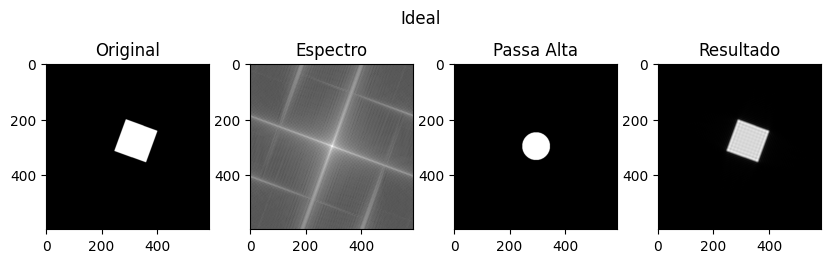

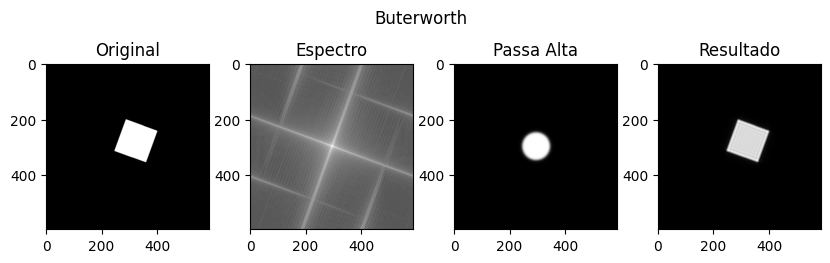

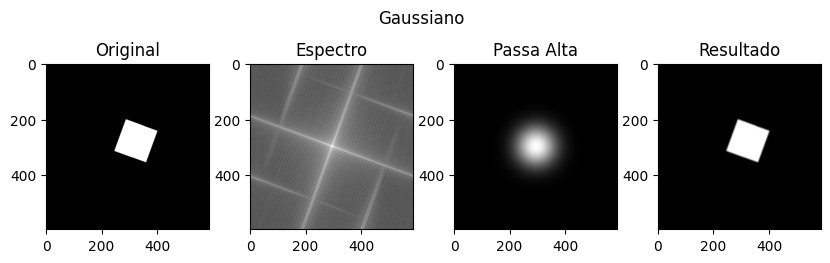

In [ ]:
center = fourier_centralized(sinc_rot2)
passa_baixa = passa_baixa_ideal(sinc_rot2.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
espectro = ff(sinc_rot2)[1]
show_img(sinc_rot2,espectro, np.abs(passa_baixa),np.abs(passa_baixa_result), "Ideal")

passa_baixa = butterworth_passa_baixa(sinc_rot2.shape, 50, 10)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_rot2,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Buterworth")

passa_baixa = gaussiano_passa_baixa(sinc_rot2.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_rot2,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Gaussiano")

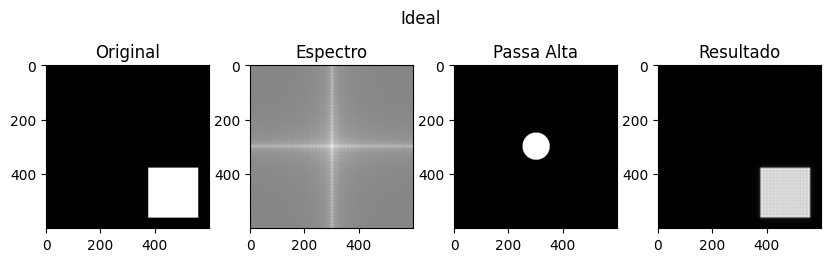

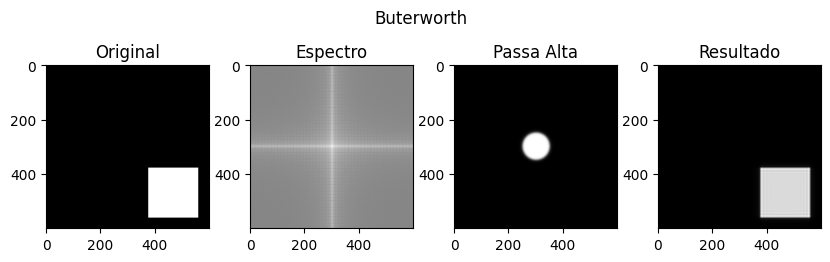

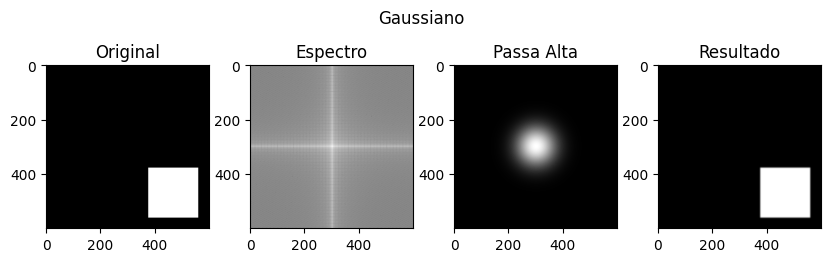

In [ ]:
center = fourier_centralized(sinc_trans)
passa_baixa = passa_baixa_ideal(sinc_trans.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
espectro = ff(sinc_trans)[1]
show_img(sinc_trans,espectro, np.abs(passa_baixa),np.abs(passa_baixa_result), "Ideal")

passa_baixa = butterworth_passa_baixa(sinc_trans.shape, 50, 10)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_trans,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Buterworth")

passa_baixa = gaussiano_passa_baixa(sinc_trans.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_trans,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Gaussiano")

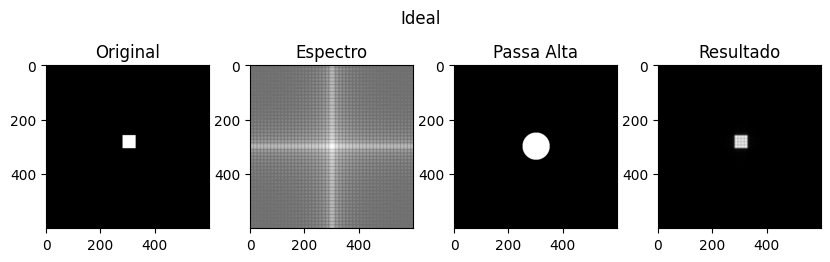

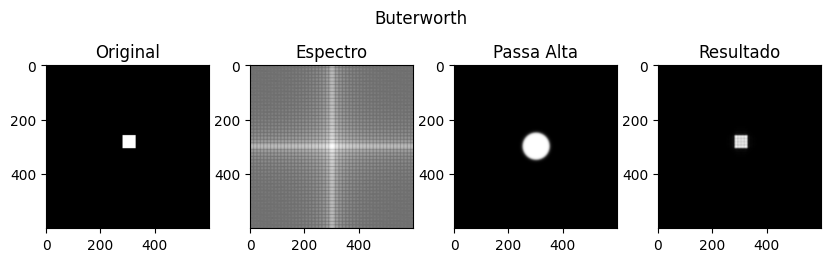

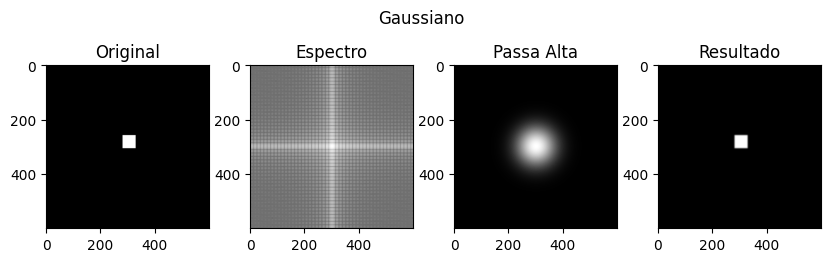

In [ ]:
center = fourier_centralized(sinc_original_menor)
passa_baixa = passa_baixa_ideal(sinc_original_menor.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
espectro = ff(sinc_original_menor)[1]
show_img(sinc_original_menor,espectro, np.abs(passa_baixa),np.abs(passa_baixa_result), "Ideal")

passa_baixa = butterworth_passa_baixa(sinc_original_menor.shape, 50, 10)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_original_menor,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Buterworth")

passa_baixa = gaussiano_passa_baixa(sinc_original_menor.shape, 50)
passa_baixa_result = aplica_filtro(center, passa_baixa)
show_img(sinc_original_menor,espectro, np.abs(passa_baixa), np.abs(passa_baixa_result), "Gaussiano")

#### 3- Crie um filtro passa-alta do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize os mesmos dados da tarefa anterior:

a)    a imagem inicial;

b)    a imagem do spectro de fourier;

c)    a imagem de cada filtro;

d)     a imagem resultante após aplicação de cada filtro.

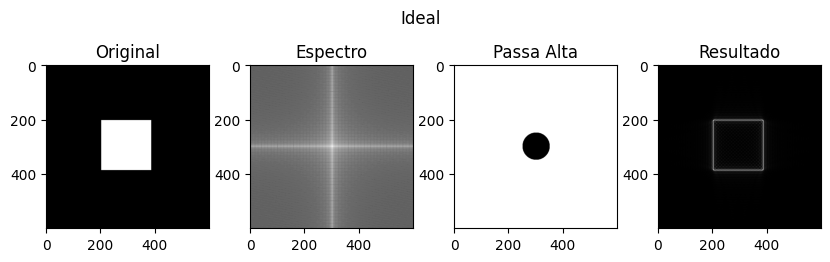

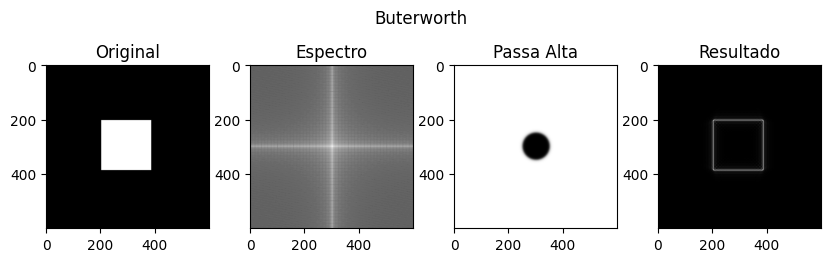

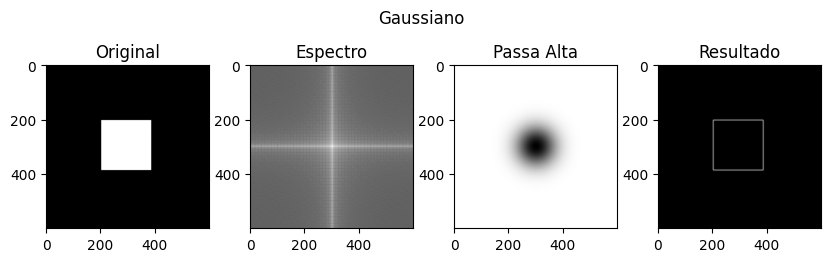

In [ ]:
def show_img(img_original, img_spectrum, img_high_pass, img_result, tipo):
    fig = plt.figure(figsize=(10, 5))
    plt1 = plt.subplot(1, 4, 1)
    plt2 = plt.subplot(1, 4, 2)
    plt3 = plt.subplot(1, 4, 3)
    plt4 = plt.subplot(1, 4, 4)
    plt1.title.set_text("Original")
    plt2.title.set_text('Espectro')
    plt3.title.set_text('Passa Alta')
    plt4.title.set_text('Resultado')
    plt1.imshow(img_original, cmap='gray')
    plt2.imshow(img_spectrum, cmap='gray')
    plt3.imshow(img_high_pass, cmap='gray')
    plt4.imshow(img_result, cmap='gray')
    fig.suptitle(tipo, fontsize=12)
    plt.subplots_adjust(top=1.3, wspace=0.25)
    
def passa_alta_ideal(imgShape, D0):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworth_passa_alta(imgShape,D0,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussiano_passa_alta(imgShape, D0):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

center = fourier_centralized(sinc_original)

passa_alta = passa_alta_ideal(sinc_original.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
espectro = ff(sinc_original)[1]
show_img(sinc_original,espectro, np.abs(passa_alta),np.abs(passa_alta_result), "Ideal")

passa_alta = butterworth_passa_alta(sinc_original.shape, 50, 10)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_original,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Buterworth")

passa_alta = gaussiano_passa_alta(sinc_original.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_original,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Gaussiano")


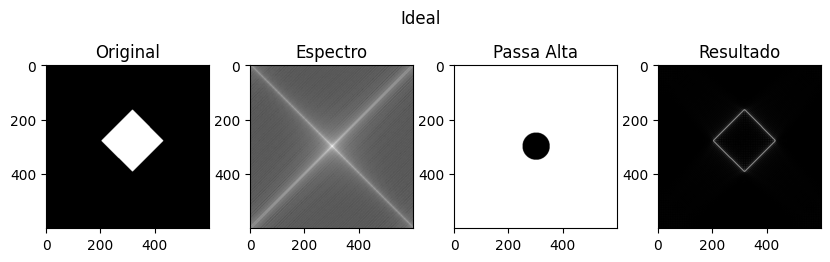

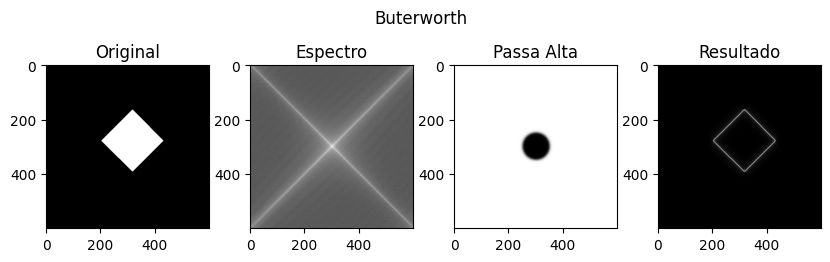

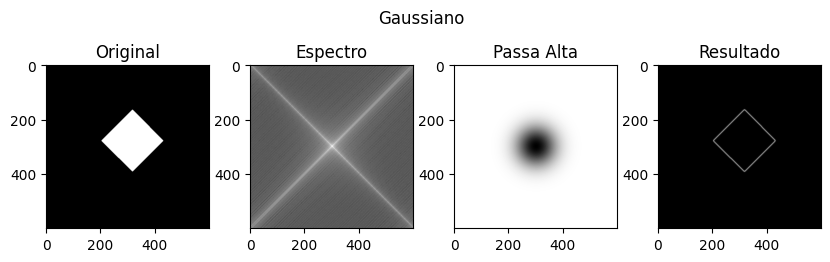

In [ ]:
center = fourier_centralized(sinc_rot)

passa_alta = passa_alta_ideal(sinc_rot.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
espectro = ff(sinc_rot)[1]
show_img(sinc_rot,espectro, np.abs(passa_alta),np.abs(passa_alta_result), "Ideal")

passa_alta = butterworth_passa_alta(sinc_rot.shape, 50, 10)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_rot,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Buterworth")

passa_alta = gaussiano_passa_alta(sinc_rot.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_rot,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Gaussiano")

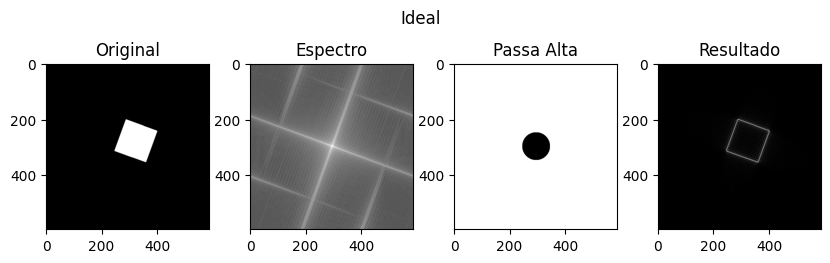

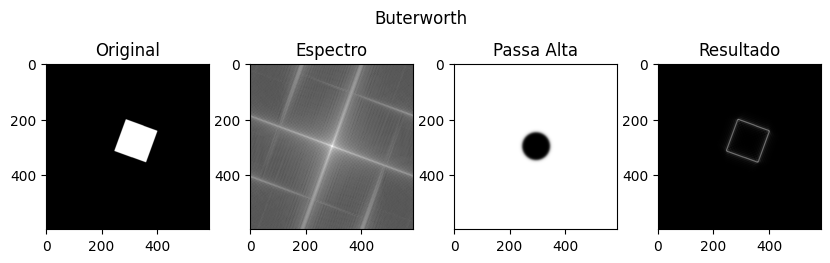

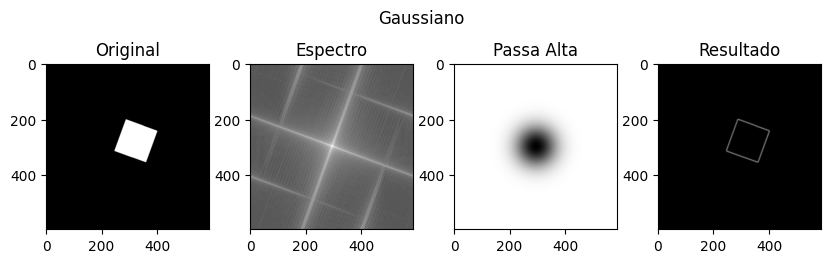

In [ ]:
center = fourier_centralized(sinc_rot2)

passa_alta = passa_alta_ideal(sinc_rot2.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
espectro = ff(sinc_rot2)[1]
show_img(sinc_rot2,espectro, np.abs(passa_alta),np.abs(passa_alta_result), "Ideal")

passa_alta = butterworth_passa_alta(sinc_rot2.shape, 50, 10)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_rot2,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Buterworth")

passa_alta = gaussiano_passa_alta(sinc_rot2.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_rot2,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Gaussiano")

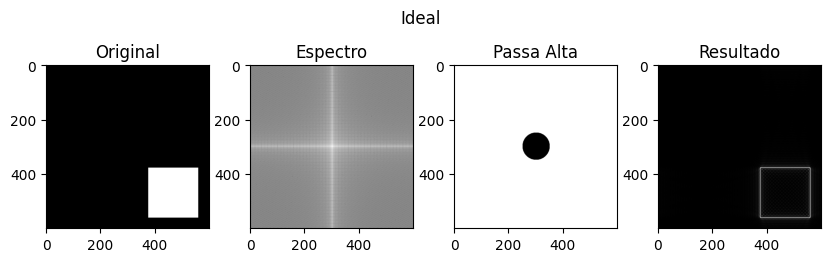

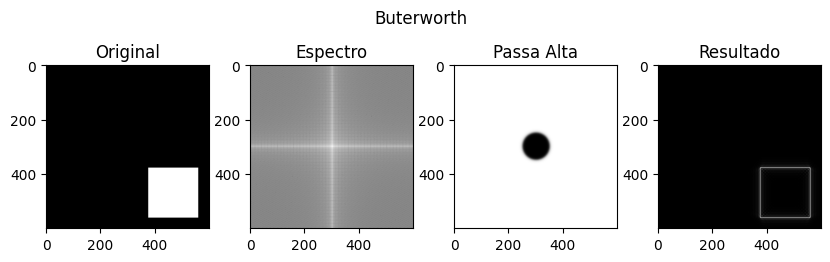

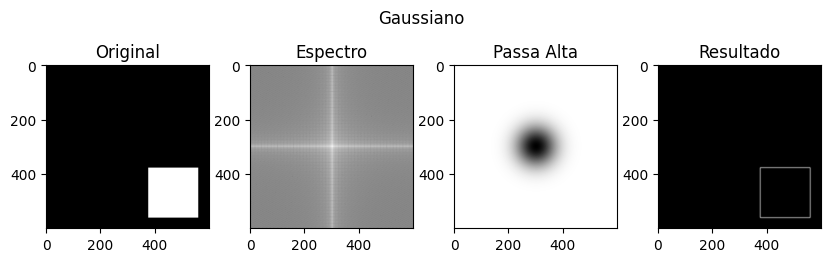

In [ ]:
center = fourier_centralized(sinc_trans)

passa_alta = passa_alta_ideal(sinc_trans.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
espectro = ff(sinc_trans)[1]
show_img(sinc_trans,espectro, np.abs(passa_alta),np.abs(passa_alta_result), "Ideal")

passa_alta = butterworth_passa_alta(sinc_trans.shape, 50, 10)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_trans,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Buterworth")

passa_alta = gaussiano_passa_alta(sinc_trans.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_trans,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Gaussiano")

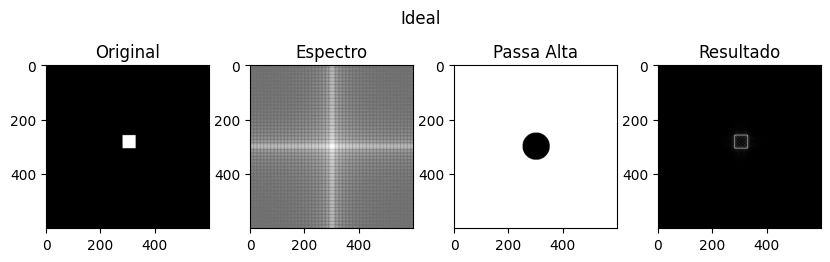

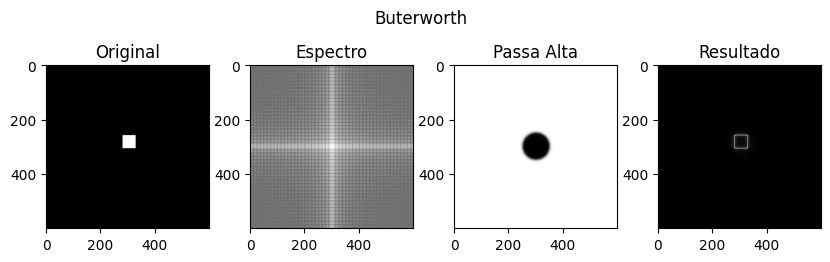

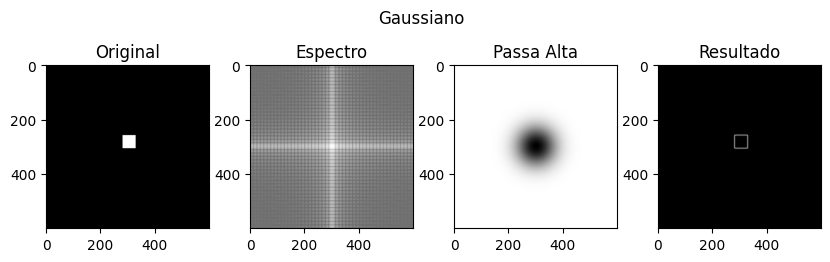

In [ ]:
center = fourier_centralized(sinc_original_menor)

passa_alta = passa_alta_ideal(sinc_original_menor.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
espectro = ff(sinc_original_menor)[1]
show_img(sinc_original_menor,espectro, np.abs(passa_alta),np.abs(passa_alta_result), "Ideal")

passa_alta = butterworth_passa_alta(sinc_original_menor.shape, 50, 10)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_original_menor,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Buterworth")

passa_alta = gaussiano_passa_alta(sinc_original_menor.shape, 50)
passa_alta_result = aplica_filtro(center, passa_alta)
show_img(sinc_original_menor,espectro, np.abs(passa_alta), np.abs(passa_alta_result), "Gaussiano")

#### 4- Varie o parâmetro de frequência de corte no filtro passa-baixa criado na tarefa 2. Por exemplo, tome valores de D0 iguais a 0,01, 0,05, 0,5. A imagem inicial é igual à anterior. Visualize as imagens dos filtros e as imagens resultantes. Explique os resultados.

Quanto menor os valores do parâmetro de frequência de corte o filtro passa-baixa permitirá a passagem de frequências muito baixas e rejeitará a maioria das frequências mais altas.

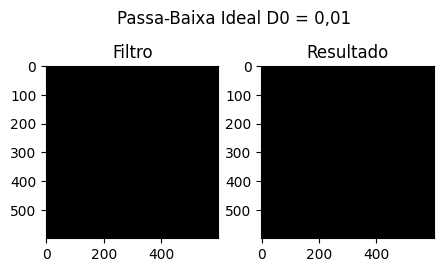

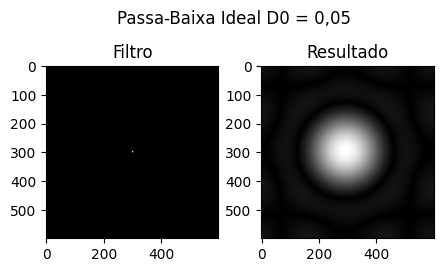

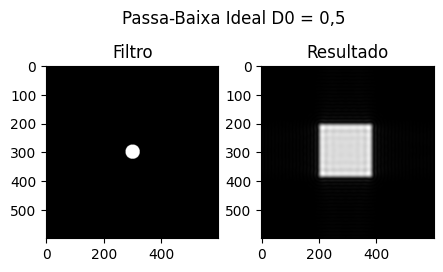

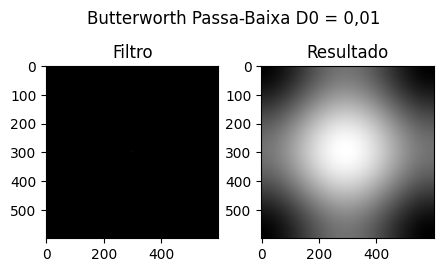

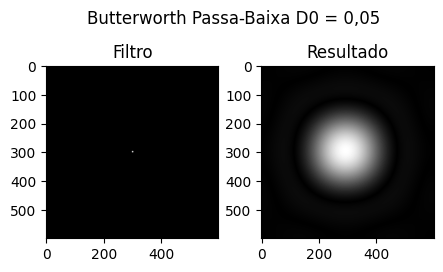

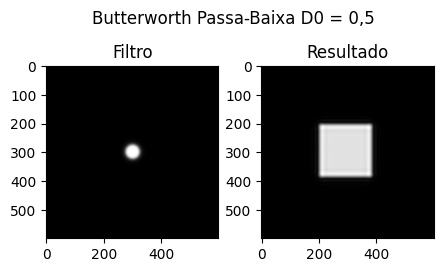

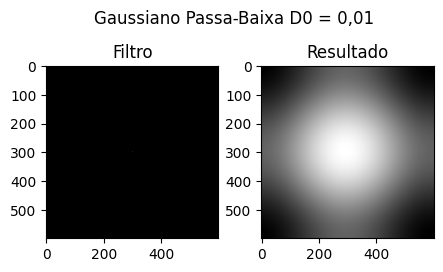

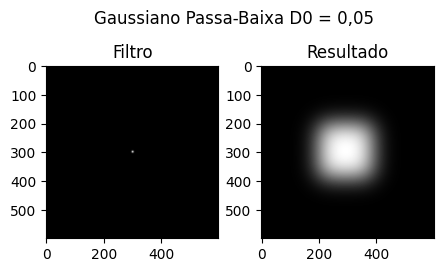

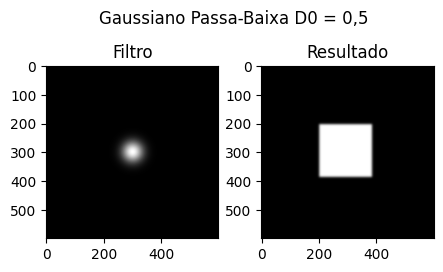

In [ ]:
def show_img(img_original, img_1, tipo):
    fig = plt.figure(figsize=(5, 3))
    plt1 = plt.subplot(1, 2, 1)
    plt2 = plt.subplot(1, 2, 2)
    plt1.title.set_text("Filtro")
    plt2.title.set_text('Resultado')
    plt1.imshow(img_original, cmap='gray')
    plt2.imshow(img_1, cmap='gray')
    fig.suptitle(tipo, fontsize=12)
    plt.subplots_adjust(top=0.9, wspace=0.25)
    
center = fourier_centralized(sinc_original)
show_img(np.abs(passa_baixa_ideal(sinc_original.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_original.shape, 50*0.01))),
        "Passa-Baixa Ideal D0 = 0,01")

show_img(np.abs(passa_baixa_ideal(sinc_original.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_original.shape, 50*0.05))),
        "Passa-Baixa Ideal D0 = 0,05")

show_img(np.abs(passa_baixa_ideal(sinc_original.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_original.shape, 50*0.5))),
        "Passa-Baixa Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_baixa(sinc_original.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_original.shape, 50*0.01, 4))),
        "Butterworth Passa-Baixa D0 = 0,01")

show_img(np.abs(butterworth_passa_baixa(sinc_original.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_original.shape, 50*0.05, 4))),
        "Butterworth Passa-Baixa D0 = 0,05")

show_img(np.abs(butterworth_passa_baixa(sinc_original.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_original.shape, 50*0.5, 4))),
        "Butterworth Passa-Baixa D0 = 0,5")

show_img(np.abs(gaussiano_passa_baixa(sinc_original.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_original.shape, 50*0.01))),
        "Gaussiano Passa-Baixa D0 = 0,01")

show_img(np.abs(gaussiano_passa_baixa(sinc_original.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_original.shape, 50*0.05))),
        "Gaussiano Passa-Baixa D0 = 0,05")

show_img(np.abs(gaussiano_passa_baixa(sinc_original.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_original.shape, 50*0.5))),
        "Gaussiano Passa-Baixa D0 = 0,5")

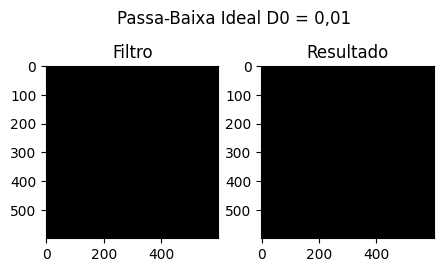

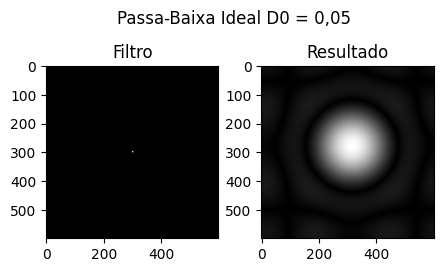

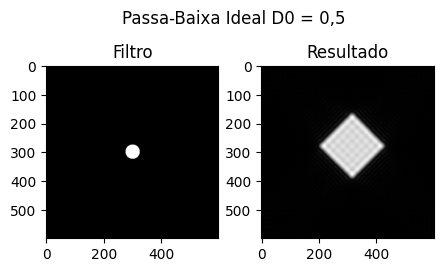

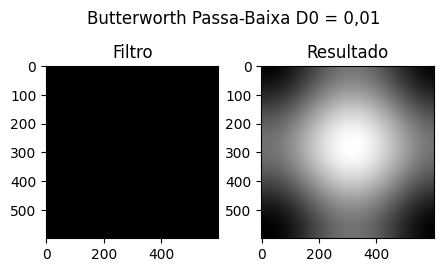

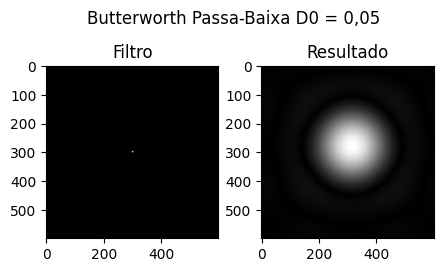

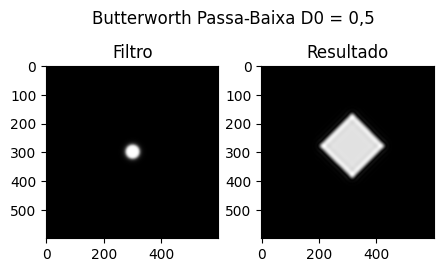

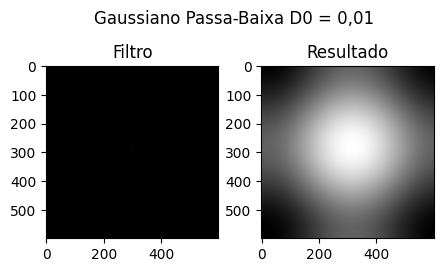

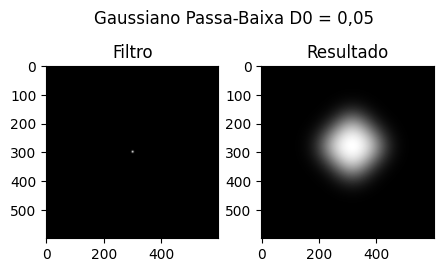

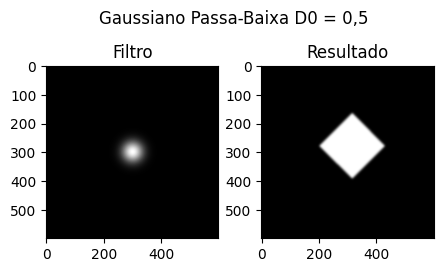

In [ ]:
center = fourier_centralized(sinc_rot)
show_img(np.abs(passa_baixa_ideal(sinc_rot.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_rot.shape, 50*0.01))),
        "Passa-Baixa Ideal D0 = 0,01")

show_img(np.abs(passa_baixa_ideal(sinc_rot.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_rot.shape, 50*0.05))),
        "Passa-Baixa Ideal D0 = 0,05")

show_img(np.abs(passa_baixa_ideal(sinc_rot.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_rot.shape, 50*0.5))),
        "Passa-Baixa Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_baixa(sinc_rot.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_rot.shape, 50*0.01, 4))),
        "Butterworth Passa-Baixa D0 = 0,01")

show_img(np.abs(butterworth_passa_baixa(sinc_rot.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_rot.shape, 50*0.05, 4))),
        "Butterworth Passa-Baixa D0 = 0,05")

show_img(np.abs(butterworth_passa_baixa(sinc_rot.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_rot.shape, 50*0.5, 4))),
        "Butterworth Passa-Baixa D0 = 0,5")

show_img(np.abs(gaussiano_passa_baixa(sinc_rot.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_rot.shape, 50*0.01))),
        "Gaussiano Passa-Baixa D0 = 0,01")

show_img(np.abs(gaussiano_passa_baixa(sinc_rot.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_rot.shape, 50*0.05))),
        "Gaussiano Passa-Baixa D0 = 0,05")

show_img(np.abs(gaussiano_passa_baixa(sinc_rot.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_rot.shape, 50*0.5))),
        "Gaussiano Passa-Baixa D0 = 0,5")

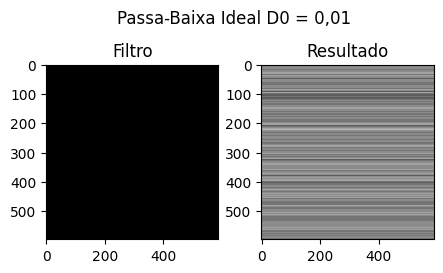

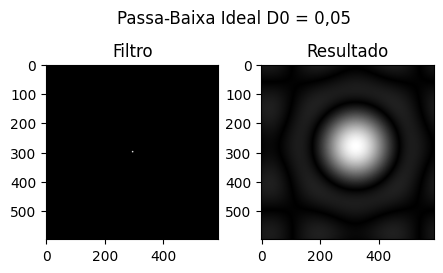

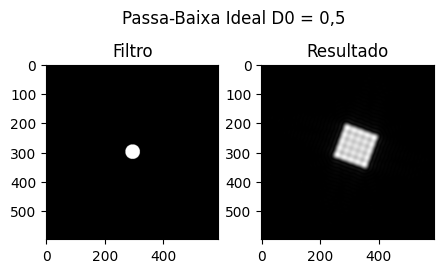

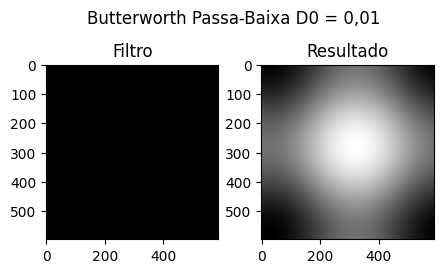

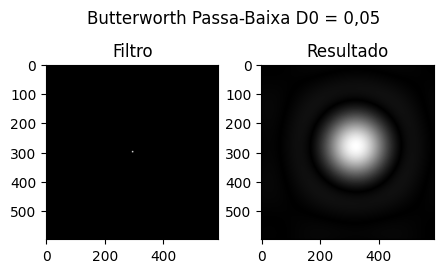

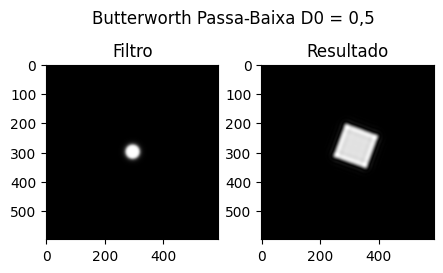

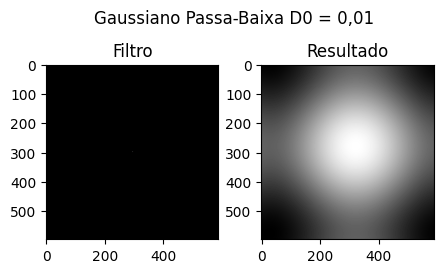

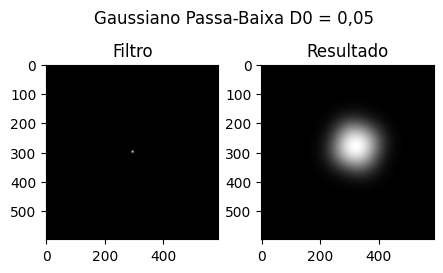

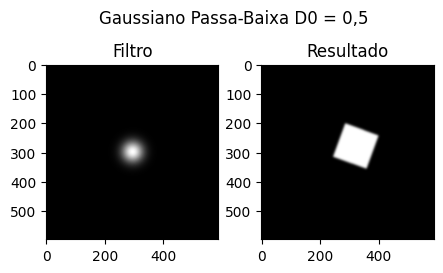

In [ ]:
center = fourier_centralized(sinc_rot2)
show_img(np.abs(passa_baixa_ideal(sinc_rot2.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_rot2.shape, 50*0.01))),
        "Passa-Baixa Ideal D0 = 0,01")

show_img(np.abs(passa_baixa_ideal(sinc_rot2.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_rot2.shape, 50*0.05))),
        "Passa-Baixa Ideal D0 = 0,05")

show_img(np.abs(passa_baixa_ideal(sinc_rot2.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_rot2.shape, 50*0.5))),
        "Passa-Baixa Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_baixa(sinc_rot2.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_rot2.shape, 50*0.01, 4))),
        "Butterworth Passa-Baixa D0 = 0,01")

show_img(np.abs(butterworth_passa_baixa(sinc_rot2.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_rot2.shape, 50*0.05, 4))),
        "Butterworth Passa-Baixa D0 = 0,05")

show_img(np.abs(butterworth_passa_baixa(sinc_rot2.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_rot2.shape, 50*0.5, 4))),
        "Butterworth Passa-Baixa D0 = 0,5")

show_img(np.abs(gaussiano_passa_baixa(sinc_rot2.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_rot2.shape, 50*0.01))),
        "Gaussiano Passa-Baixa D0 = 0,01")

show_img(np.abs(gaussiano_passa_baixa(sinc_rot2.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_rot2.shape, 50*0.05))),
        "Gaussiano Passa-Baixa D0 = 0,05")

show_img(np.abs(gaussiano_passa_baixa(sinc_rot2.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_rot2.shape, 50*0.5))),
        "Gaussiano Passa-Baixa D0 = 0,5")


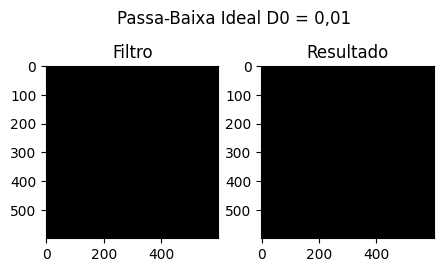

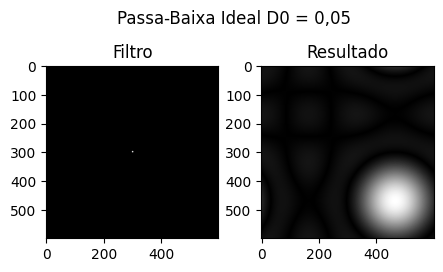

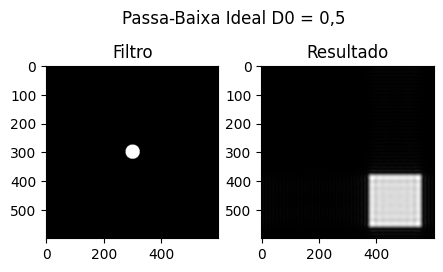

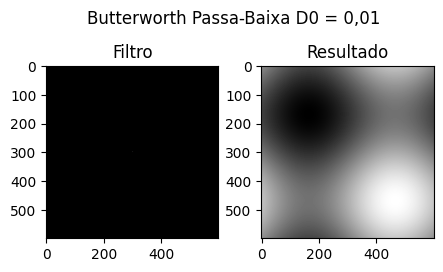

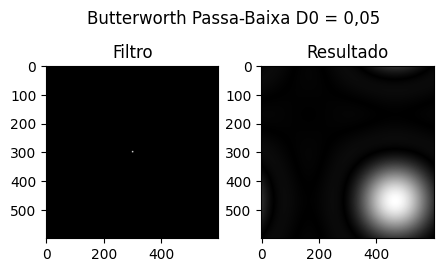

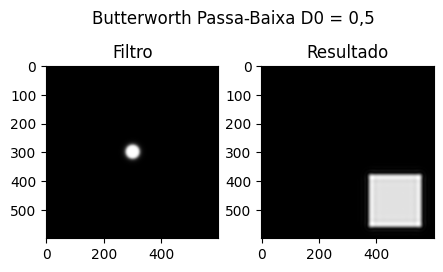

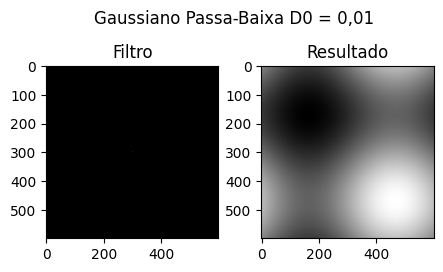

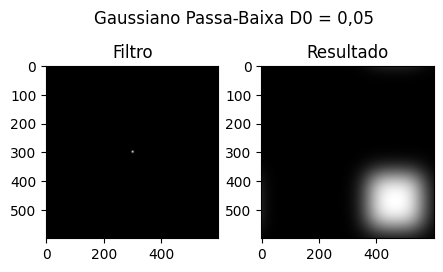

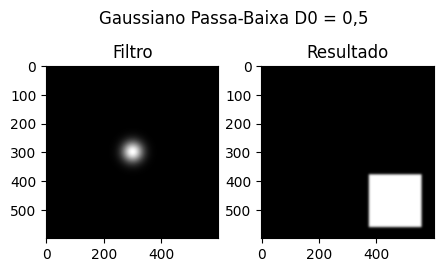

In [ ]:
center = fourier_centralized(sinc_trans)
show_img(np.abs(passa_baixa_ideal(sinc_trans.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_trans.shape, 50*0.01))),
        "Passa-Baixa Ideal D0 = 0,01")

show_img(np.abs(passa_baixa_ideal(sinc_trans.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_trans.shape, 50*0.05))),
        "Passa-Baixa Ideal D0 = 0,05")

show_img(np.abs(passa_baixa_ideal(sinc_trans.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_trans.shape, 50*0.5))),
        "Passa-Baixa Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_baixa(sinc_trans.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_trans.shape, 50*0.01, 4))),
        "Butterworth Passa-Baixa D0 = 0,01")

show_img(np.abs(butterworth_passa_baixa(sinc_trans.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_trans.shape, 50*0.05, 4))),
        "Butterworth Passa-Baixa D0 = 0,05")

show_img(np.abs(butterworth_passa_baixa(sinc_trans.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_trans.shape, 50*0.5, 4))),
        "Butterworth Passa-Baixa D0 = 0,5")

show_img(np.abs(gaussiano_passa_baixa(sinc_trans.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_trans.shape, 50*0.01))),
        "Gaussiano Passa-Baixa D0 = 0,01")

show_img(np.abs(gaussiano_passa_baixa(sinc_trans.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_trans.shape, 50*0.05))),
        "Gaussiano Passa-Baixa D0 = 0,05")

show_img(np.abs(gaussiano_passa_baixa(sinc_trans.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_trans.shape, 50*0.5))),
        "Gaussiano Passa-Baixa D0 = 0,5")

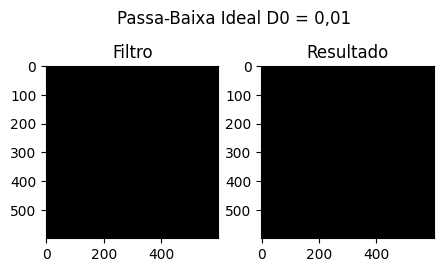

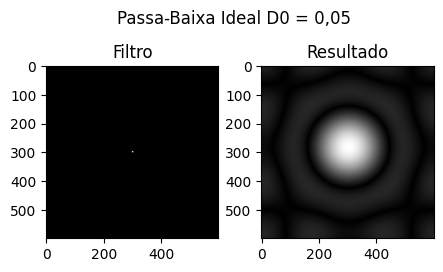

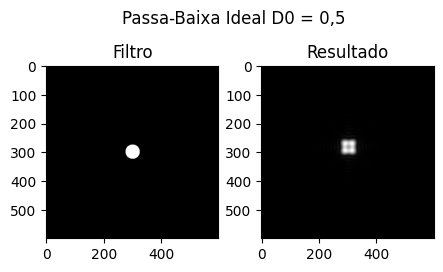

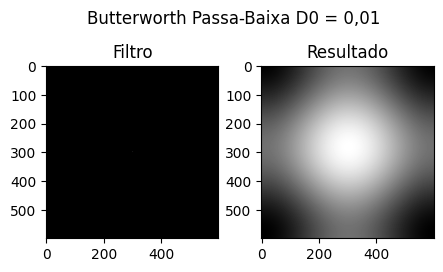

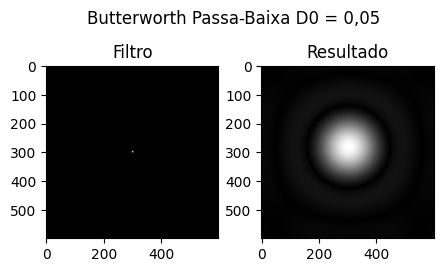

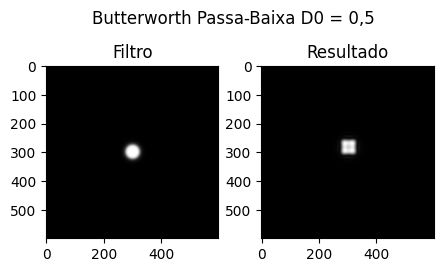

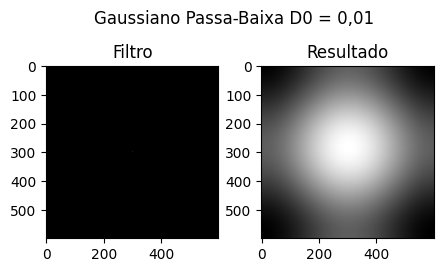

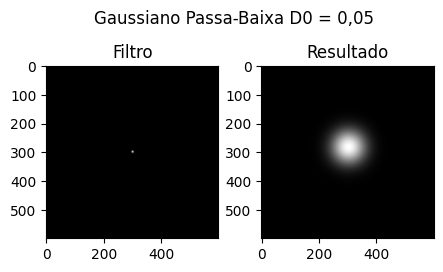

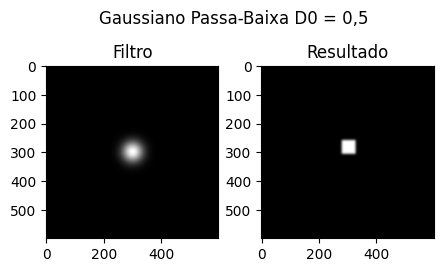

In [ ]:
center = fourier_centralized(sinc_original_menor)
show_img(np.abs(passa_baixa_ideal(sinc_original_menor.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_original_menor.shape, 50*0.01))),
        "Passa-Baixa Ideal D0 = 0,01")

show_img(np.abs(passa_baixa_ideal(sinc_original_menor.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_original_menor.shape, 50*0.05))),
        "Passa-Baixa Ideal D0 = 0,05")

show_img(np.abs(passa_baixa_ideal(sinc_original_menor.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_baixa_ideal(sinc_original_menor.shape, 50*0.5))),
        "Passa-Baixa Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_baixa(sinc_original_menor.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_original_menor.shape, 50*0.01, 4))),
        "Butterworth Passa-Baixa D0 = 0,01")

show_img(np.abs(butterworth_passa_baixa(sinc_original_menor.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_original_menor.shape, 50*0.05, 4))),
        "Butterworth Passa-Baixa D0 = 0,05")

show_img(np.abs(butterworth_passa_baixa(sinc_original_menor.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_baixa(sinc_original_menor.shape, 50*0.5, 4))),
        "Butterworth Passa-Baixa D0 = 0,5")

show_img(np.abs(gaussiano_passa_baixa(sinc_original_menor.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_original_menor.shape, 50*0.01))),
        "Gaussiano Passa-Baixa D0 = 0,01")

show_img(np.abs(gaussiano_passa_baixa(sinc_original_menor.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_original_menor.shape, 50*0.05))),
        "Gaussiano Passa-Baixa D0 = 0,05")

show_img(np.abs(gaussiano_passa_baixa(sinc_original_menor.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_baixa(sinc_original_menor.shape, 50*0.5))),
        "Gaussiano Passa-Baixa D0 = 0,5")

#### 5- Efetue o mesmo que se pede no item 4, mas use o filtro passa-alta em vez do filtro passa-baixa.

Em um filtro passa-alta, valores maiores de D0 permitem a passagem de frequências mais altas, enquanto valores menores de D0 restringem a passagem de frequências mais altas. 

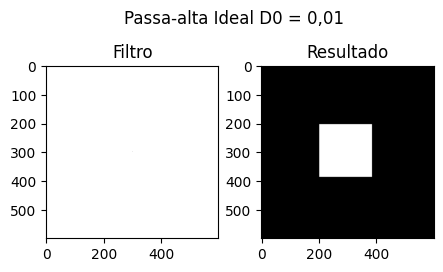

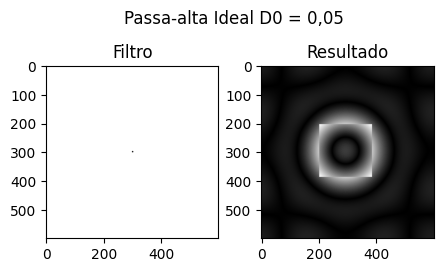

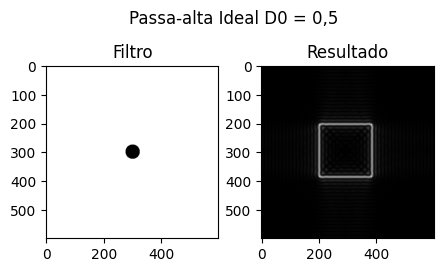

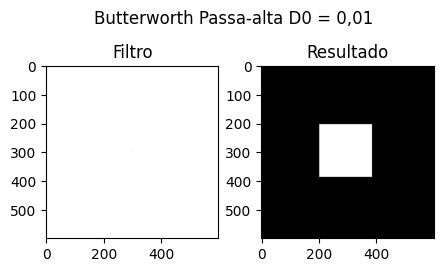

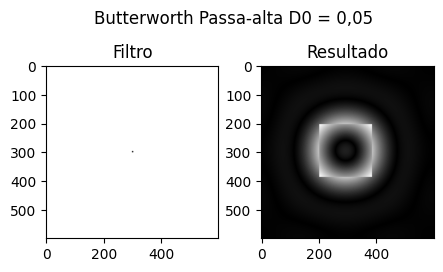

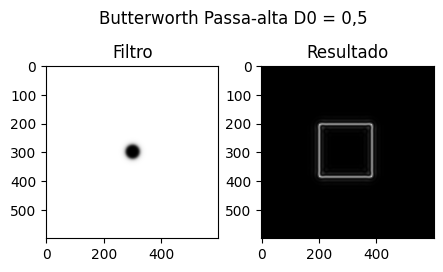

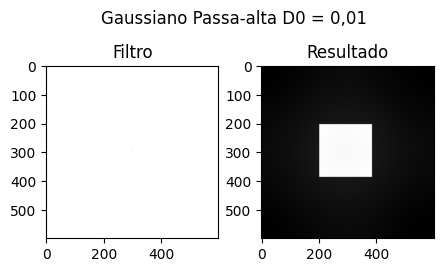

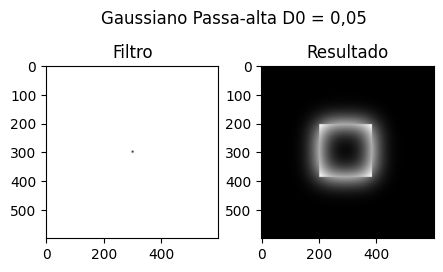

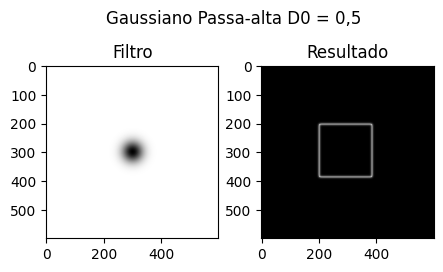

In [ ]:
center = fourier_centralized(sinc_original)
show_img(np.abs(passa_alta_ideal(sinc_original.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_original.shape, 50*0.01))),
        "Passa-alta Ideal D0 = 0,01")

show_img(np.abs(passa_alta_ideal(sinc_original.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_original.shape, 50*0.05))),
        "Passa-alta Ideal D0 = 0,05")

show_img(np.abs(passa_alta_ideal(sinc_original.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_original.shape, 50*0.5))),
        "Passa-alta Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_alta(sinc_original.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_original.shape, 50*0.01, 4))),
        "Butterworth Passa-alta D0 = 0,01")

show_img(np.abs(butterworth_passa_alta(sinc_original.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_original.shape, 50*0.05, 4))),
        "Butterworth Passa-alta D0 = 0,05")

show_img(np.abs(butterworth_passa_alta(sinc_original.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_original.shape, 50*0.5, 4))),
        "Butterworth Passa-alta D0 = 0,5")

show_img(np.abs(gaussiano_passa_alta(sinc_original.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_original.shape, 50*0.01))),
        "Gaussiano Passa-alta D0 = 0,01")

show_img(np.abs(gaussiano_passa_alta(sinc_original.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_original.shape, 50*0.05))),
        "Gaussiano Passa-alta D0 = 0,05")

show_img(np.abs(gaussiano_passa_alta(sinc_original.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_original.shape, 50*0.5))),
        "Gaussiano Passa-alta D0 = 0,5")

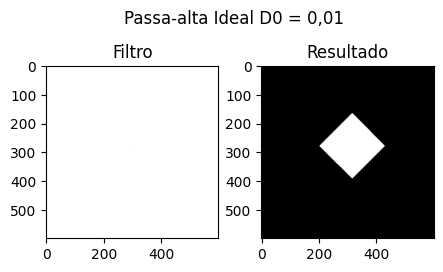

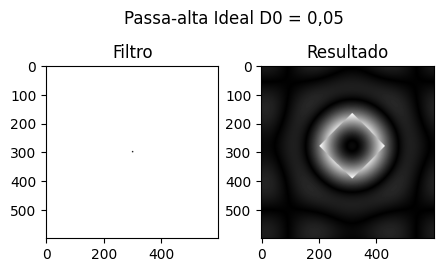

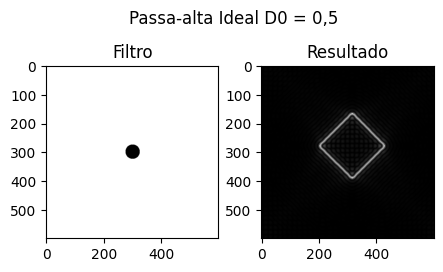

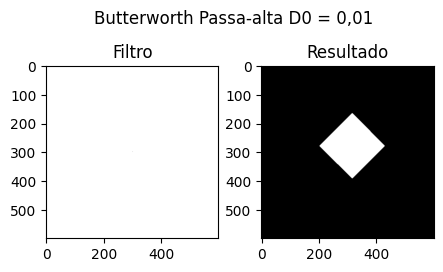

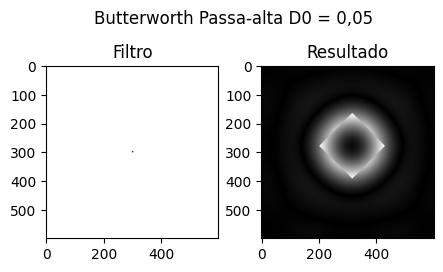

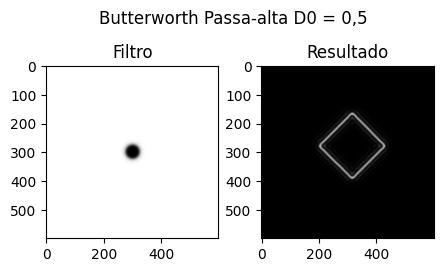

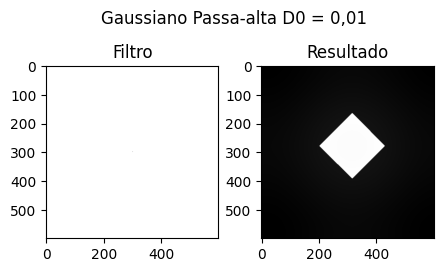

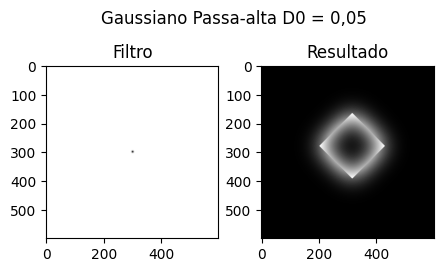

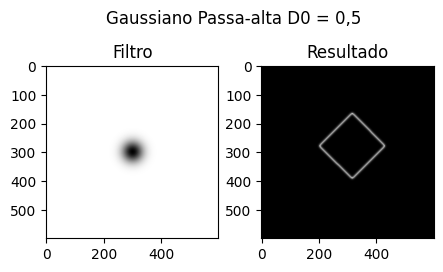

In [ ]:
center = fourier_centralized(sinc_rot)
show_img(np.abs(passa_alta_ideal(sinc_rot.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_rot.shape, 50*0.01))),
        "Passa-alta Ideal D0 = 0,01")

show_img(np.abs(passa_alta_ideal(sinc_rot.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_rot.shape, 50*0.05))),
        "Passa-alta Ideal D0 = 0,05")

show_img(np.abs(passa_alta_ideal(sinc_rot.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_rot.shape, 50*0.5))),
        "Passa-alta Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_alta(sinc_rot.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_rot.shape, 50*0.01, 4))),
        "Butterworth Passa-alta D0 = 0,01")

show_img(np.abs(butterworth_passa_alta(sinc_rot.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_rot.shape, 50*0.05, 4))),
        "Butterworth Passa-alta D0 = 0,05")

show_img(np.abs(butterworth_passa_alta(sinc_rot.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_rot.shape, 50*0.5, 4))),
        "Butterworth Passa-alta D0 = 0,5")

show_img(np.abs(gaussiano_passa_alta(sinc_rot.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_rot.shape, 50*0.01))),
        "Gaussiano Passa-alta D0 = 0,01")

show_img(np.abs(gaussiano_passa_alta(sinc_rot.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_rot.shape, 50*0.05))),
        "Gaussiano Passa-alta D0 = 0,05")

show_img(np.abs(gaussiano_passa_alta(sinc_rot.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_rot.shape, 50*0.5))),
        "Gaussiano Passa-alta D0 = 0,5")

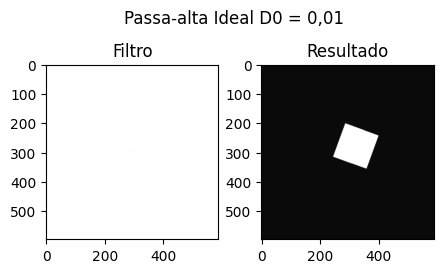

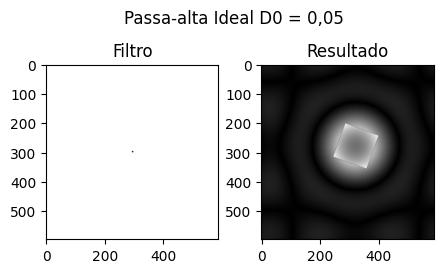

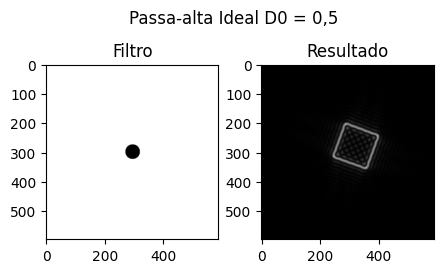

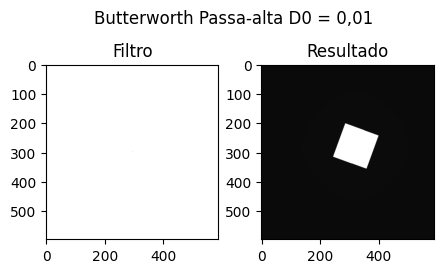

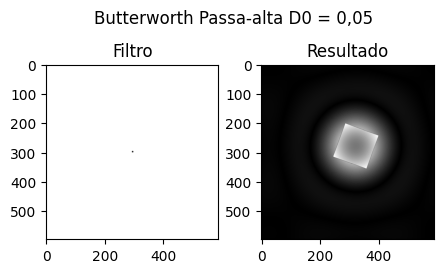

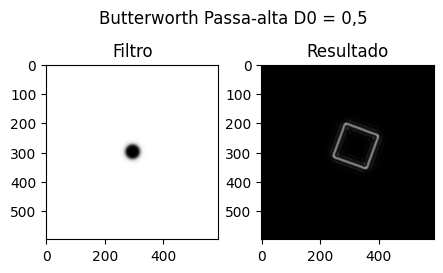

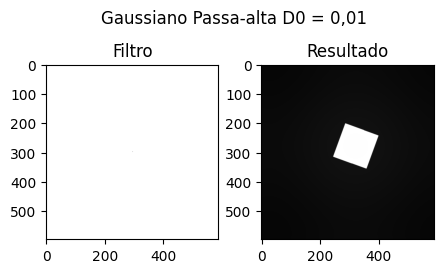

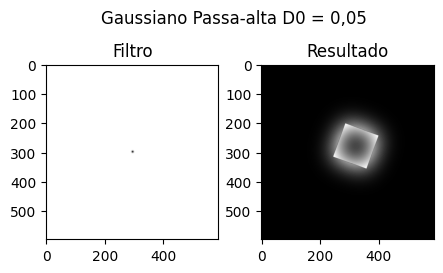

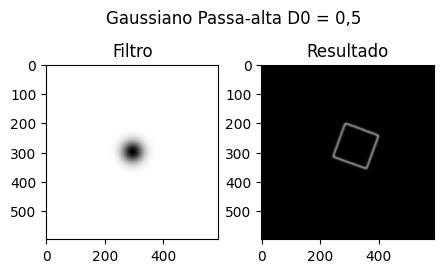

In [ ]:
center = fourier_centralized(sinc_rot2)
show_img(np.abs(passa_alta_ideal(sinc_rot2.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_rot2.shape, 50*0.01))),
        "Passa-alta Ideal D0 = 0,01")

show_img(np.abs(passa_alta_ideal(sinc_rot2.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_rot2.shape, 50*0.05))),
        "Passa-alta Ideal D0 = 0,05")

show_img(np.abs(passa_alta_ideal(sinc_rot2.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_rot2.shape, 50*0.5))),
        "Passa-alta Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_alta(sinc_rot2.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_rot2.shape, 50*0.01, 4))),
        "Butterworth Passa-alta D0 = 0,01")

show_img(np.abs(butterworth_passa_alta(sinc_rot2.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_rot2.shape, 50*0.05, 4))),
        "Butterworth Passa-alta D0 = 0,05")

show_img(np.abs(butterworth_passa_alta(sinc_rot2.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_rot2.shape, 50*0.5, 4))),
        "Butterworth Passa-alta D0 = 0,5")

show_img(np.abs(gaussiano_passa_alta(sinc_rot2.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_rot2.shape, 50*0.01))),
        "Gaussiano Passa-alta D0 = 0,01")

show_img(np.abs(gaussiano_passa_alta(sinc_rot2.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_rot2.shape, 50*0.05))),
        "Gaussiano Passa-alta D0 = 0,05")

show_img(np.abs(gaussiano_passa_alta(sinc_rot2.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_rot2.shape, 50*0.5))),
        "Gaussiano Passa-alta D0 = 0,5")


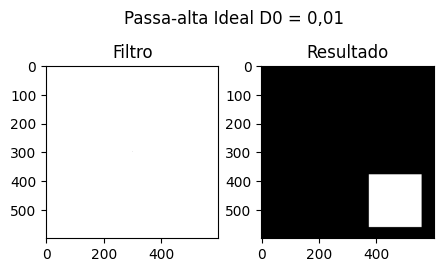

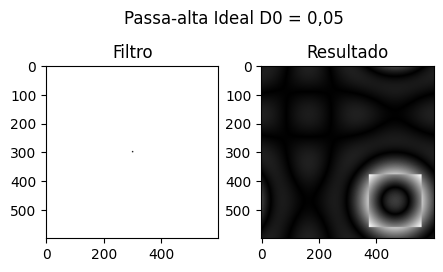

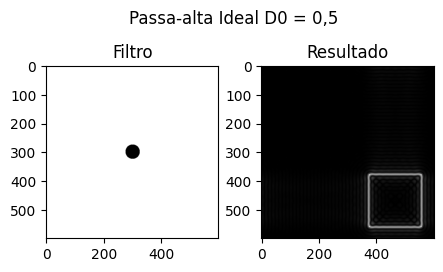

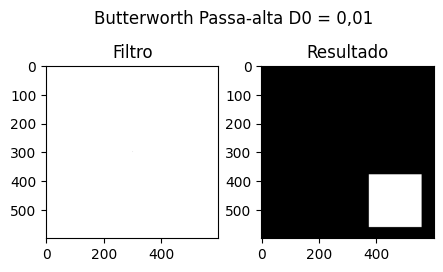

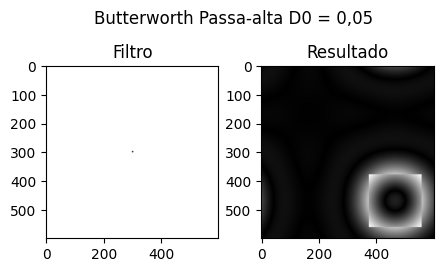

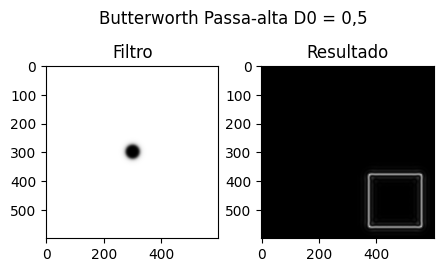

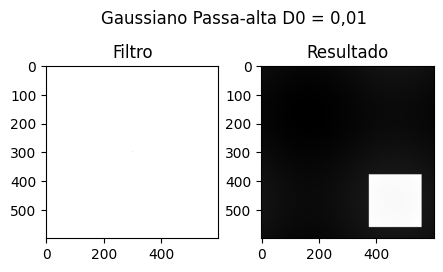

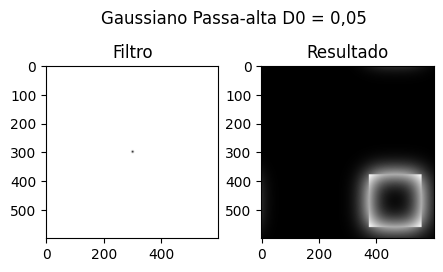

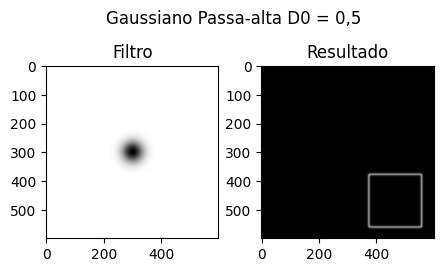

In [ ]:
center = fourier_centralized(sinc_trans)
show_img(np.abs(passa_alta_ideal(sinc_trans.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_trans.shape, 50*0.01))),
        "Passa-alta Ideal D0 = 0,01")

show_img(np.abs(passa_alta_ideal(sinc_trans.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_trans.shape, 50*0.05))),
        "Passa-alta Ideal D0 = 0,05")

show_img(np.abs(passa_alta_ideal(sinc_trans.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_trans.shape, 50*0.5))),
        "Passa-alta Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_alta(sinc_trans.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_trans.shape, 50*0.01, 4))),
        "Butterworth Passa-alta D0 = 0,01")

show_img(np.abs(butterworth_passa_alta(sinc_trans.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_trans.shape, 50*0.05, 4))),
        "Butterworth Passa-alta D0 = 0,05")

show_img(np.abs(butterworth_passa_alta(sinc_trans.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_trans.shape, 50*0.5, 4))),
        "Butterworth Passa-alta D0 = 0,5")

show_img(np.abs(gaussiano_passa_alta(sinc_trans.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_trans.shape, 50*0.01))),
        "Gaussiano Passa-alta D0 = 0,01")

show_img(np.abs(gaussiano_passa_alta(sinc_trans.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_trans.shape, 50*0.05))),
        "Gaussiano Passa-alta D0 = 0,05")

show_img(np.abs(gaussiano_passa_alta(sinc_trans.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_trans.shape, 50*0.5))),
        "Gaussiano Passa-alta D0 = 0,5")

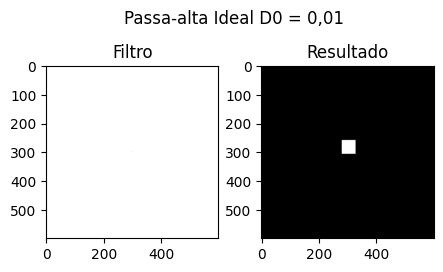

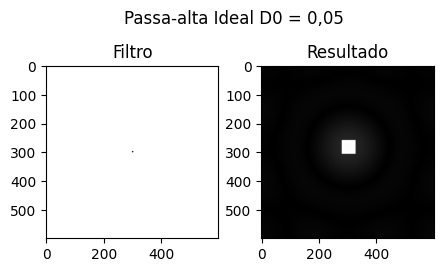

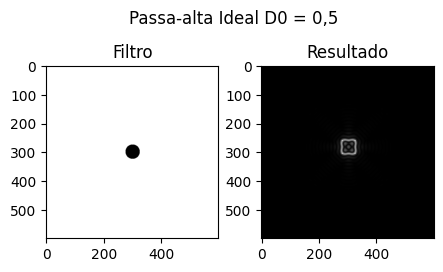

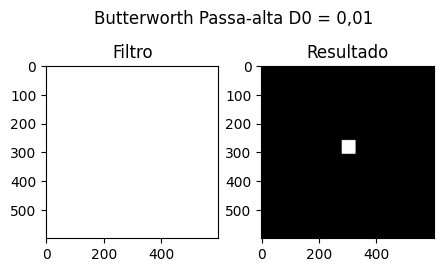

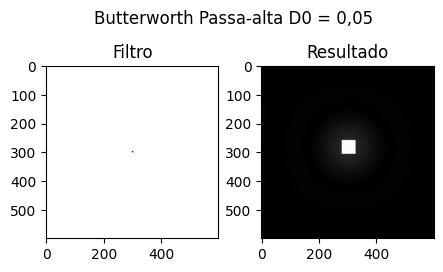

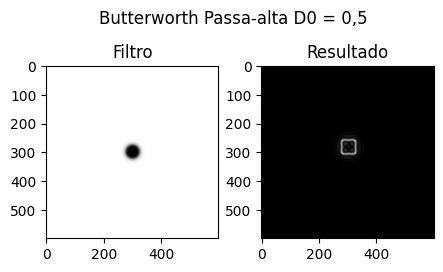

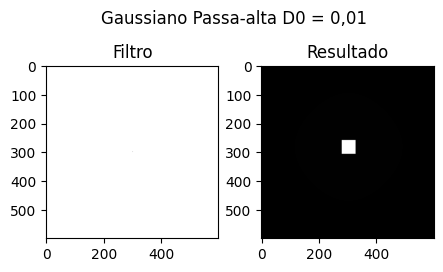

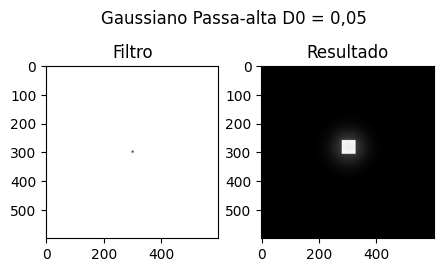

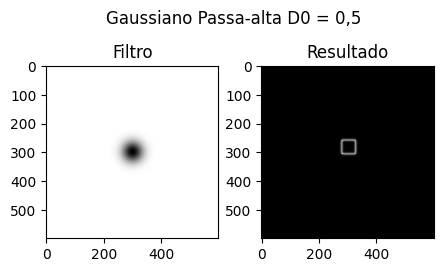

In [ ]:
center = fourier_centralized(sinc_original_menor)
show_img(np.abs(passa_alta_ideal(sinc_original_menor.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_original_menor.shape, 50*0.01))),
        "Passa-alta Ideal D0 = 0,01")

show_img(np.abs(passa_alta_ideal(sinc_original_menor.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_original_menor.shape, 50*0.05))),
        "Passa-alta Ideal D0 = 0,05")

show_img(np.abs(passa_alta_ideal(sinc_original_menor.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, passa_alta_ideal(sinc_original_menor.shape, 50*0.5))),
        "Passa-alta Ideal D0 = 0,5")

show_img(np.abs(butterworth_passa_alta(sinc_original_menor.shape, 50*0.01, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_original_menor.shape, 50*0.01, 4))),
        "Butterworth Passa-alta D0 = 0,01")

show_img(np.abs(butterworth_passa_alta(sinc_original_menor.shape, 50*0.05, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_original_menor.shape, 50*0.05, 4))),
        "Butterworth Passa-alta D0 = 0,05")

show_img(np.abs(butterworth_passa_alta(sinc_original_menor.shape, 50*0.5, 4)), 
         np.abs(aplica_filtro(center, butterworth_passa_alta(sinc_original_menor.shape, 50*0.5, 4))),
        "Butterworth Passa-alta D0 = 0,5")

show_img(np.abs(gaussiano_passa_alta(sinc_original_menor.shape, 50*0.01)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_original_menor.shape, 50*0.01))),
        "Gaussiano Passa-alta D0 = 0,01")

show_img(np.abs(gaussiano_passa_alta(sinc_original_menor.shape, 50*0.05)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_original_menor.shape, 50*0.05))),
        "Gaussiano Passa-alta D0 = 0,05")

show_img(np.abs(gaussiano_passa_alta(sinc_original_menor.shape, 50*0.5)), 
         np.abs(aplica_filtro(center, gaussiano_passa_alta(sinc_original_menor.shape, 50*0.5))),
        "Gaussiano Passa-alta D0 = 0,5")

#### 6- Além dos filtros passa-baixa e passa-alta também existe o filtro passa-banda? Explique seu funcionamento e aplique um filtro passa-banda na imagem.

O filtro passa-banda é um filtro obtido atravez da união dos filtros passa-baixa e passa-alta, esse é um filtro que passa as frequências dentro de uma faixa e rejeita frequências fora dessa faixa.

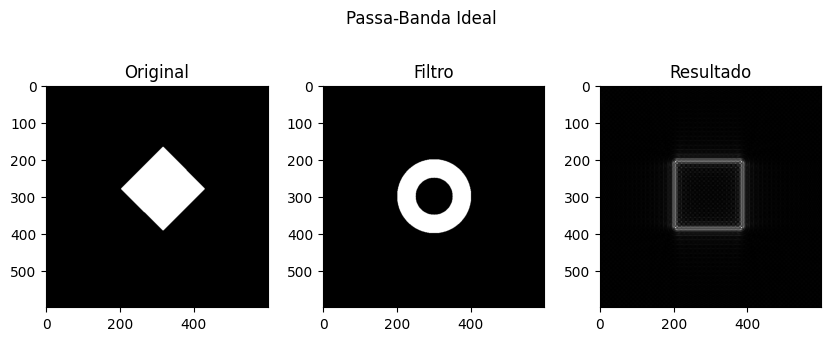

In [ ]:
def passa_banda_ideal(DL, DH, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if (distance((y,x),center) > DL and distance((y,x),center) < DH):
                base[y,x] = 1
            else:
                base[y,x] = 0
    return base

def show_img(img_original, img_filtro, img_result, tipo):
    fig = plt.figure(figsize=(10, 5))
    plt1 = plt.subplot(1, 3, 1)
    plt2 = plt.subplot(1, 3, 2)
    plt3 = plt.subplot(1, 3, 3)
    plt1.title.set_text("Original")
    plt2.title.set_text('Filtro')
    plt3.title.set_text('Resultado')
    plt1.imshow(img_original, cmap='gray')
    plt2.imshow(img_filtro, cmap='gray')
    plt3.imshow(img_result, cmap='gray')
    fig.suptitle(tipo, fontsize=12)
    plt.subplots_adjust(top=1.1, wspace=0.25)
    
center = fourier_centralized(sinc_original)
show_img(sinc_rot, np.abs(passa_banda_ideal(50, 100, sinc_original.shape)),
         np.abs(aplica_filtro(center, passa_banda_ideal(50, 100, sinc_original.shape))), "Passa-Banda Ideal")